## Observations and Insights

## Dependencies and starter code

In [3]:
#write at least 3 observations or inferences that can be made from the data

#1. Having an outlier for Final Tumor Volume is nearly impossible, as it has to be below -9.51 or above 105.14
#2. Ramicane and Capomulin had the two lowest Tumor Volume SEM and were the most effective regimens
#3. Tumor volume had minimal effects on a mouse's weights

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = combined_df.groupby('Drug Regimen')

tumor_vol_mean = regimen_df["Tumor Volume (mm3)"].mean()

tumor_vol_med =regimen_df["Tumor Volume (mm3)"].median()

tumor_vol_std= regimen_df["Tumor Volume (mm3)"].std()

tumor_vol_var = (tumor_vol_std)**2

tumor_sem = regimen_df["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({"Tumor Volume Mean": tumor_vol_mean,
                       "Tumor Volume Median": tumor_vol_med,
                       "Tumor Volume Variance": tumor_vol_var,
                       "Tumor Volume Standard Deviation": tumor_vol_std,
                       "Tumor Volume SEM": tumor_sem})

tumor_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Number of Data Points per Regimen')

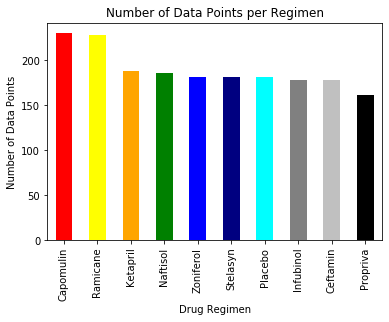

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

data_points = combined_df['Drug Regimen'].value_counts()
colors = ['red','yellow','orange','green','blue','navy', 'aqua', 'gray', 'silver', 'black']
data_points.plot(kind="bar", colors = colors)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points per Regimen")

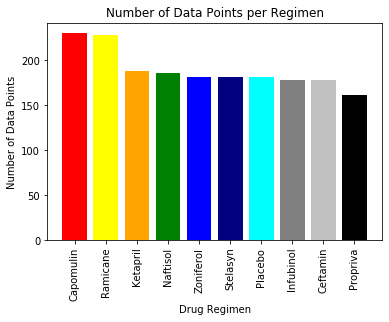

In [24]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(data_points.index.values,data_points.values, color=['red','yellow','orange','green','blue','navy', 'aqua', 'gray', 'silver', 'black'])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points per Regimen")
plt.xticks(rotation=90)
plt.show()


# Pie plots

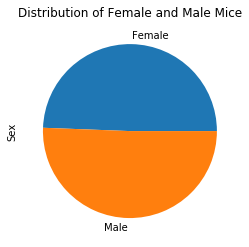

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = combined_df.groupby("Sex")

count= gender_df["Sex"].count()
count
count.plot(kind="pie", title = "Distribution of Female and Male Mice")



In [10]:
count

Sex
Female    935
Male      958
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Female and Male Mice')

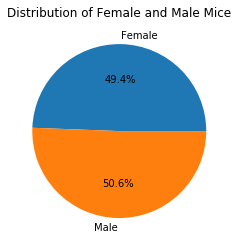

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = count["Male"]
female= count["Female"]

labels = ["Female", "Male"]
gendercount = [female,male]
#explode = (0.1, 0)

plt.pie(gendercount, labels = labels, autopct="%1.1f%%")
plt.title("Distribution of Female and Male Mice")

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
mouse_df = combined_df[['Mouse ID','Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

df_ramicane = mouse_df[mouse_df['Drug Regimen'] == 'Ramicane']
df_capomulin = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']
df_ceftamin = mouse_df[mouse_df['Drug Regimen'] == 'Ceftamin']
df_infubinol = mouse_df[mouse_df['Drug Regimen'] == 'Infubinol']


#Combine DFs for four diff drugs using append
combined_drug_df = df_ramicane.append(df_capomulin)
combined_drug_df = combined_drug_df.append(df_ceftamin)
combined_drug_df = combined_drug_df.append(df_infubinol)
combined_drug_df = combined_drug_df.set_index('Mouse ID')

combined_drug_df = combined_drug_df[combined_drug_df['Timepoint'] == 45]
combined_drug_df = combined_drug_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
combined_drug_df




,Drug Regimen,Timepoint,Final Tumor Volume (mm3),Weight (g)
Mouse ID,,,,
k403,Ramicane,45,22.050126,16
g791,Ramicane,45,29.128472,16
s508,Ramicane,45,30.276232,17
m546,Ramicane,45,30.564625,16
z578,Ramicane,45,30.638696,16
j913,Ramicane,45,31.560470,17
n364,Ramicane,45,31.095335,17
c758,Ramicane,45,33.397653,17
a644,Ramicane,45,32.978522,17


In [13]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor = combined_drug_df['Final Tumor Volume (mm3)']

quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = combined_drug_df.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
outlier_tumor.head()

The lower quartile of final tumor volume is: 33.48002734
The upper quartile of final tumor volume is: 62.14221369
The interquartile range of final tumor volume is: 28.66218635
The the median of occupancy is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


,Drug Regimen,Timepoint,Final Tumor Volume (mm3),Weight (g)
Mouse ID,,,,


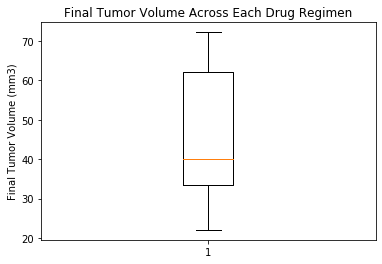

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Final Tumor Volume Across Each Drug Regimen")
ax.boxplot(final_tumor)
plt.show()


## Line and scatter plots

([<matplotlib.axis.XTick at 0x1c8823780f0>,
 <a list of 10 Text xticklabel objects>)

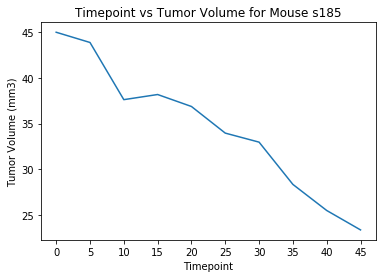

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_capomulin

capo_mouse = df_capomulin[df_capomulin['Mouse ID'] == 's185']

plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'])

plt.title("Timepoint vs Tumor Volume for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
#Set increments of 5 on x values
plt.xticks(np.arange(0, 50, 5))

Text(0.5, 1.0, 'Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')

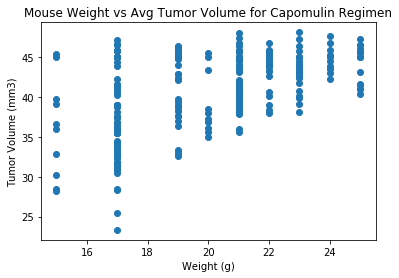

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_capomulin
weight_tumor = df_capomulin['Weight (g)']
avg_tumor_vol = df_capomulin['Tumor Volume (mm3)']    #It's incorrect, but adding .mean() gave an error

plt.scatter(weight_tumor, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin Regimen")

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between the Weight (g) and Average Tumor Volume is {st.pearsonr(weight_tumor,avg_tumor_vol)}")

The correlation coefficient between the Weight (g) and Average Tumor Volume is (0.5256995552077173, 9.605446629500897e-18)
